# Satellite images and spectral bands

* **Special requirements:** A Google account, access to Google Earth Engine.
* **Prerequisites:** You should have completed the "Week 1 - Prac 2" notebook.


## Background

Satellite images,
spectral bands.


***

## Aims of the practical session

The main aim of this practical session is to understand that satellite images are comprised of bands that capture different regions of the electromagnetic spectrum


***

## Description

In this notebook you'll learn about the 'layers' or 'bands' of a satellite image, how you can access single satellite images using GEE, and how you can use these 'layers' or 'bands' to highlight certain landscape features. 

First we will:
- Add a single image (e.g., Landsat image) of the Canberra region, and.
- Visualize each band separately. 

Then we will:
- describe certain features in each band.

Lastly, we will:
- Create composites from single images (RGB, etc)
- Compare bands and explaining when/why some bands may be useful to detect some features and not others

<div class="alert alert-block alert-warning">
<b>Assessment:</b> Once you finish the practical and the excercises, remember to submit your notebook through Wattle.
Challenges are optional and will not be part of the assessment.
</div>

***

## Satellite images are comprised of several spectral bands


![2.1_Fig2.png](https://github.com/nicolasyounes/engn3903/raw/main/figures/2.1_Fig2.png)
 Image source: [ESRI](https://www.esri.com/about/newsroom/wp-content/uploads/files/2016/08/04-fig-4-32.png)

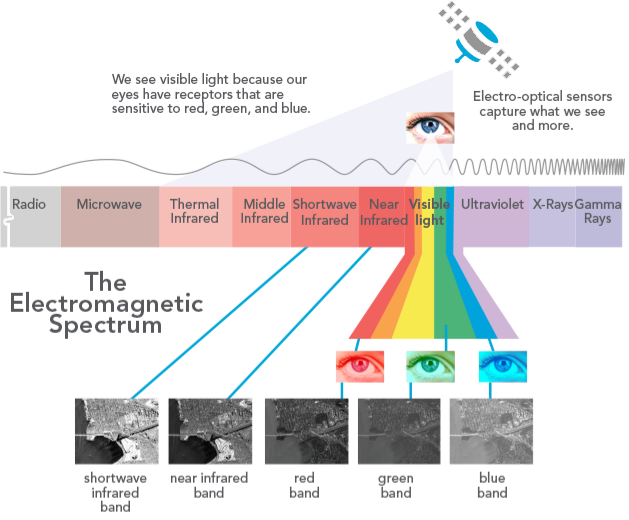

***

## Getting started


### Load packages

Import Python packages that are used for the analysis.


In [ ]:
%matplotlib inline

import geemap as gmap
import ee
import pandas as pd
import matplotlib.pyplot as plt

### Connect to Google Earth Engine (GEE)

Connect to the GEE so we can access GEE datasets and computing assets.
You may be required to input your Google account name and password. Please keep those safe and don't share them with anyone.

In [ ]:
m = gmap.Map()

***

## Load a satellite image of the ACT region.


Use a Landsat 8 image.

First, let's display the image in 'True color'. True Color means that we display the Red, Green, and Blue (RGB) bands. This makes it more intuitive to distinguish the features in the image.

You can find more information about the spectral bands of the Landsat 8 sensor [here](https://www.usgs.gov/media/images/landsat-8-band-designations)

In [ ]:
# We give the 'center' location, and a 'zoom' level.
Map = gmap.Map(center=[-35,149], zoom=6)

# Select a Landsat 8 scene with little cloud cover
landsat8 = ee.Image('LANDSAT/LC08/C01/T1_SR/LC08_090084_20130723')

# Now we select the bands we want to display
landsat_vis = {'bands': ['B4', 'B3', 'B2'],
              'min': 0, ### min and max parameters indicate the range of pixel values to which the palette should be applied.
              'max': 3000}

# add the Landsat 8 image to the map.
Map.addLayer(landsat8, landsat_vis, "Landsat 8 Image 2013-07-07 ")
Map

### Visualize individual bands, one at a time. 

From the Landsat 8 image above, let's display each band individually, starting from the Blue band.

For each band, describe what you see in terms of:
1. what does water look like? See, for example, the sea.

1. Can you distinguish any features *in* the water?

1. Describe how buildings and other artificial structures are displayed (e.g. roads, airports, industrial complexes).

1. What does vegetation look like? Are sport fields different from forests and crops? is vegetation bright or dark?


**GEE Tip:** use the 'inspector tool' to see if water, forest, crops, artificial surfaces and other land covers have different values. 

In [ ]:
# Visualize Blue band.
Map.addLayer(landsat8, {'bands':['B2'], 'min':0, 'max':3000}, 'Blue band')

In [ ]:
# Visualize Green band.
Map.addLayer(landsat8, {'bands':['B3'], 'min':0, 'max':3000}, 'Green band')

In [ ]:
# Visualize Red band.
Map.addLayer(landsat8, {'bands':['B4'], 'min':0, 'max':3000}, 'Red band')

Now is your turn to visualize other spectral bands of the same image.

Add the NIR, SWIR1, SWIR2, and Cirrus bands, and describe what you see using the same questions as above.

In [ ]:
# Your code goes here.


***

### <a name="ex1"></a> Exercise 1 -  Understanding the spectral response of different features

Now that you know the area covered by the Landsat Image, it is time to do an exercise!

In this exercise you'll need to:

1. Get the values of 3-5 different pixels for a few different landcover feature from different bands, and put them into your `dataframe` (see example code below).
2. Plot the values of each feature taken from various bands(see example code below).
3. Answer the questions in the markdown cell below the plots

**Excercise tip:** Use only bands 2 - 7 for this excercise.


Below, we'll create a pandas DataFrame with pixel values for different land cover types

First, identify some land cover types (e,g, forest, water, urban, soil/sand ) and add the pixel values to the 'pixel_values' dictionary. Collect a few repeat samples for each landcover type using the inspector tool.

An example of water and forest pixels has been entered for you.  **You need to add more examples to the dictionary below**


In [ ]:
# List of the bands we are entering in the dictionary below.
bands = ['B2', 'B3', 'B4', 'B5', 'B7']

#Enter a few repeated pixel values for a series of landcover types
pixel_values = {
    # Landcover : [b2-value, b3-value, etc.]
    'water1' :[349, 285, 171, 131, 96],
    'water2' :[350, 310, 190, 142, 100],
    'forest1':[118,244,158,3243, 276],
    'forest2':[145,256,138,3500, 292],
}

#combine the data into a pandas dataframe
df = pd.DataFrame(pixel_values, index=bands)
df.head()

### Plot all the pixel values

Now we need to plot the table. We'll use [Matplotlib](https://matplotlib.org/) to create a figure, an then we'll plot the values of each row (i.e. pixel) independently.

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))
df.plot(ax=ax, marker='o', linestyle='-.')
ax.legend()
ax.set_title('Spectral signature for various landcover types')
ax.set_xlabel('Band (EM spectrum)')
ax.set_ylabel('Relfectance value')

### Plot the average spectral signature of each landcover class

In [ ]:
### Calculate a mean relfectance of the different land cover type
df_mean = df.groupby(lambda col: col[:-1], axis=1).mean()

fig, ax = plt.subplots(figsize=(8,5))
df_mean.plot(ax=ax, marker='o', linestyle='-.')
ax.legend()
ax.set_title('Spectral signature for various landcover types')
ax.set_xlabel('Band (EM spectrum)')
ax.set_ylabel('Relfectance value')

<div class="alert alert-block alert-danger">

**Answer the following questions:**
>- What is the feature you're looking at?,
>- What is the range of pixels values for each feature in each band?
>- Which bands are more useful to detect the presence of vegetation? why?
>- Which bands would you use to detect bare soil? why?
>- Does water look the same in all spectral bands?
>- Which bands would you use to detect features *in* the water?

</div>

**The answers to the questions go here.**


.



***

## Spectral signatures



A spectral signature is the typical spectral curves for different land covers.
For example, typical spectral signatures for soil, dry grass and green plant material are shown in the figure below. The shaded areas represent the regions detected by the Landsat TM/ETM+ sensors.

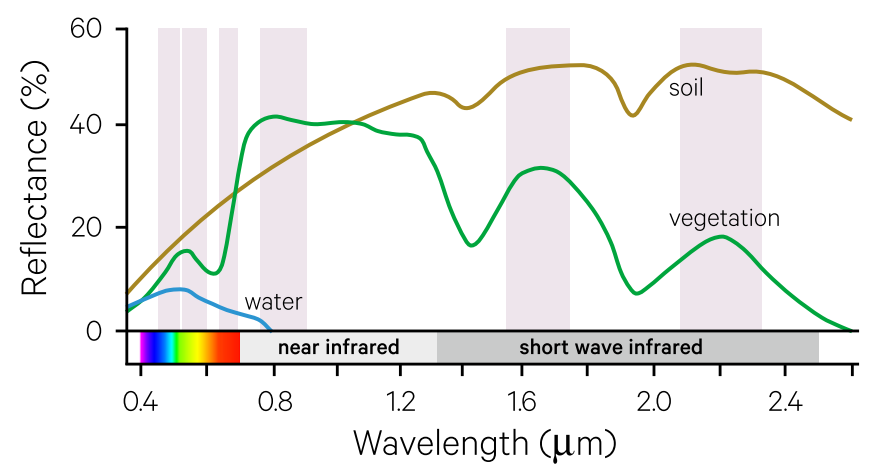2.1_spectral_signatures.PNG

Image source: CRCSI (2016) Earth Observation: Data, Processing and Applications. Volume 1A: Data—Basics and
Acquisition.

it's important to understand that the ‘spectral signatures’ in the figure above were drawn using data at a much finer  spectral resolution than those provided by Landsat, Sentinel, or MODIS sensors.


When using few spectral bands, the spectral signatures look a bit different. The figure below shows how the Landsat TM/ETM+ sensors 'see' soil, vegetation and water material.

![spectral sign](https://github.com/nicolasyounes/engn3903/raw/main/figures/2.1_spectral%20signatures%202.PNG)

Image source: CRCSI (2016) Earth Observation: Data, Processing and Applications. Volume 1A: Data—Basics and
Acquisition.

In Exercise 1 you created a plot with different land cover types.


<div class="alert alert-block alert-danger"> 

## Exercise 2

In the cell below describe any similarities and differences between your plot and the ones above. Using an example of one landcover type, explain why there may be differences.
    
</div>

**The answers to the questions go here.**


.

<div class="alert alert-block alert-danger">

## Challenge: Replicate excercise 2 but with Sentinel-2 or MODIS images.

</div>



***

## References and useful readings

- Chapters 12, 13, and 14 form the "Earth Observation: Data, Processing and Applications" book, Volume 1A: Data—Basics and Acquisition". Available through Wattle, or  http://www.crcsi.com.au/earth-observation-series.
- https://geemap.org/
- http://dx.doi.org/10.1016/j.rse.2015.11.032
- https://doi.org/10.3390/rs1030184
- https://doi.org/10.1016/j.rse.2014.02.001

***

## Additional information

**Sources:** The code in this notebook has several sources, including:
https://github.com/giswqs/geemap; 

**License:** Some of the code in this notebook was initially created by [Qiusheng Wu](https://github.com/giswqs), and has been modified by Nicolas Younes. The code in this notebook is licensed under a [Creative Commons Attribution 4.0 International License](https://creativecommons.org/licenses/by/4.0/), and an [MIT Licence](https://mit-license.org/). 

**Contact:** If you need assistance, please post a question on the ENGN3903 Wattle course forum 

**Last modified:** July 2023

***